# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

In [111]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
#isplay(contact_sheet)

In [149]:
# Createa a big canvas
from PIL import ImageDraw
#help(PIL.ImageDraw)


# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Color(image)
images=[]
for i in range(1, 10):
    images.append(image)

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width
        
# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
#display(contact_sheet)

Width:  800  Height:  450
Width:  800  Height:  495
Height of black box:  45
intensity:  0.1
intensity:  0.5
intensity:  0.9


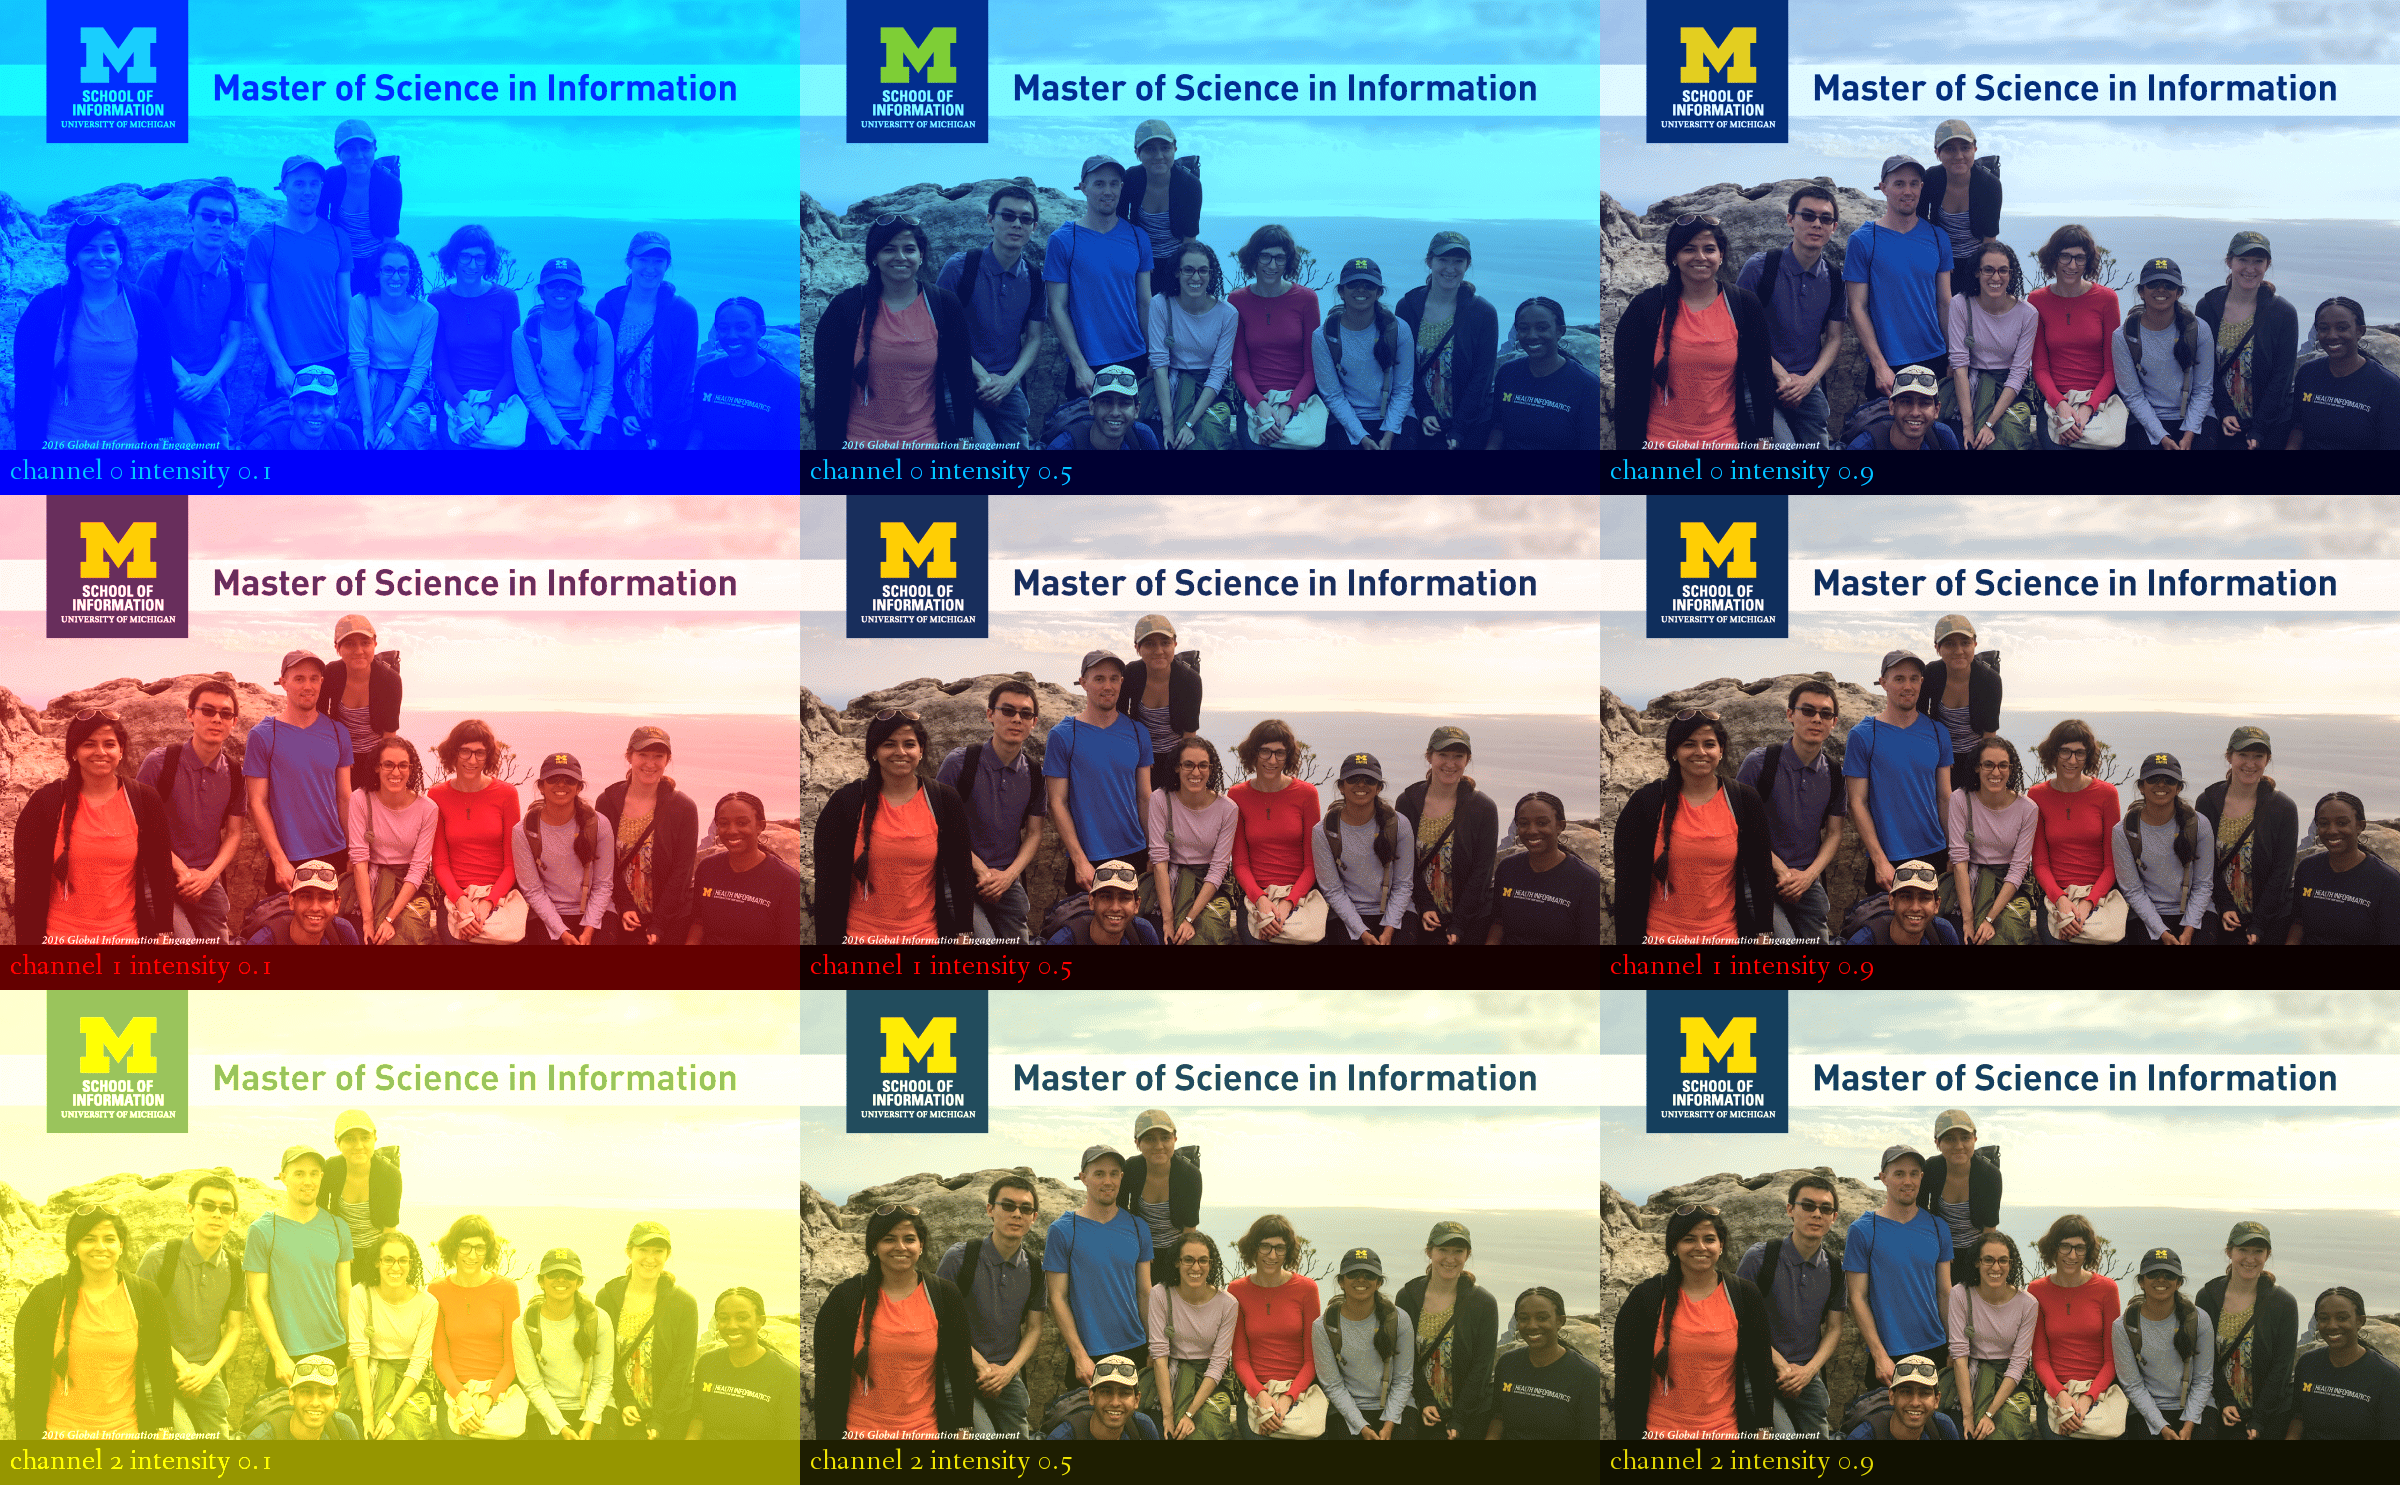

In [163]:
# Final cell 
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont
# Explanation of .convert() in https://www.geeksforgeeks.org/python-channel-drop-using-pillow/?ref=lbp
def blue_intensity( im = PIL.Image.new(mode="RGB", size=(200, 200)), intensity=1):
    print('intensity: ', intensity)
    matrix = ( 1*intensity, 0, 0, 0,
               0, 1, 0, 0,
               0, 0, 1, 25/intensity
             )

    conversed_image = im.convert("RGB",matrix)
    return conversed_image

def red_intensity(im = PIL.Image.new(mode="RGB", size=(200, 200)), float:intensity=1):
    
    matrix = ( 1, 0, 0, 10/intensity,
               0, 1, 0, 0,
               0, 0, 1, 0
             )
    
    conversed_image = im.convert("RGB",matrix)
    
    return conversed_image

def yellow_intensity(im = PIL.Image.new(mode="RGB", size=(200, 200)), float:intensity=1) -> Image:
    
    matrix = ( 1, 0, 0, 15/intensity,
               0, 1, 0, 15/intensity,
               0, 0, 1, intensity
             )
    
    conversed_image = im.convert("RGB",matrix)
    
    return conversed_image



# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')
print('Width: ', image.width, ' Height: ', image.height)

# Creating a new empty canvas
contact_sheet = PIL.Image.new(image.mode, (image.width, int(image.height*1.1)))
print('Width: ', contact_sheet.width, ' Height: ', contact_sheet.height)

height_difference = abs(image.height - contact_sheet.height)
print("Height of black box: ", height_difference)

# Pasting photo to new canvas
contact_sheet.paste(image, (0, 0))

# Saving this as my base image
base_image = contact_sheet.copy()

# Setting up channels and intensities
channels = {'channel 0': (0.1,0.5,0.9), # corresponds to blue channel 
            'channel 1': (0.1,0.5,0.9), # corresponds to red channel
            'channel 2': (0.1,0.5,0.9)} # corresponds to red channel

# Creating 9 base images
images = []
myFont = ImageFont.truetype('readonly/fanwood-webfont.ttf', 30) # Setting up our font - Custom font style and font size
for i in range(1, 10):
    images.append(base_image)
    

new_images = []
converted_images = []
# Writing into each image
i = 0
for key in channels.keys():
    #print("\n",key)
    for intensity in channels[key]:
        
        im_draw = base_image.copy()
        
        if key == 'channel 0':
            #print("\tBlue")
            #print("\t\t{}".format(intensity))
            #print("\t\tImage: {}".format(i))
            text_draw_Obj = ImageDraw.Draw(im_draw, 'RGB') # <-
            text_draw_Obj.text((10,im_draw.height - int(im_draw.height*0.075)),
                          text = key + " intensity " + str(intensity),
                          fill = (0,200,255), 
                          font = myFont
                         )
            conversion = blue_intensity(im_draw,intensity)
            converted_images.append(conversion)


        elif key == 'channel 1':
            #print("\tRed")
            #print("\t\t{}".format(intensity))
            #print("\t\tImage: {}".format(i))
            text_draw_Obj = ImageDraw.Draw(im_draw, 'RGB')
            text_draw_Obj.text((10,im_draw.height - int(im_draw.height*0.075)),
                          text = key + " intensity " + str(intensity),
                          fill = (255,0,0),
                          font = myFont
                         )
            conversion = red_intensity(im_draw,intensity)
            converted_images.append(conversion)

        
        elif key == 'channel 2':
            #print("\tYellow")
            #print("\t\t{}".format(intensity))
            #print("\t\tImage: {}".format(i))
            text_Obj = ImageDraw.Draw(im_draw, 'RGB')
            text_Obj.text((10,im_draw.height - int(im_draw.height*0.075)),
                          text = key + " intensity " + str(intensity),
                          fill = (210,200,0),
                          font = myFont
                         )
            conversion = yellow_intensity(im_draw,intensity)
            converted_images.append(conversion)

            
            
        else:
            print("Error")
        
        new_images.append(im_draw)
        #display(new_images[i])
        i = i + 1

# Creating a big canvas
big_contact_sheet = PIL.Image.new(contact_sheet.mode, (contact_sheet.width*3,contact_sheet.height*3))
x = 0
y = 0
first_image = new_images[0]
for img in converted_images: 
    # Lets paste the current image into the contact sheet
    big_contact_sheet.paste(img, (x, y) )
    if x + first_image.width == big_contact_sheet.width:
        x = 0
        y = y + first_image.height
    else:
        x = x + first_image.width
        
display(big_contact_sheet)

Width:  800  Height:  450
Width:  800  Height:  495
Height of black box:  45
type and mode of 'contact_sheet':  <class 'PIL.Image.Image'> RGB
12


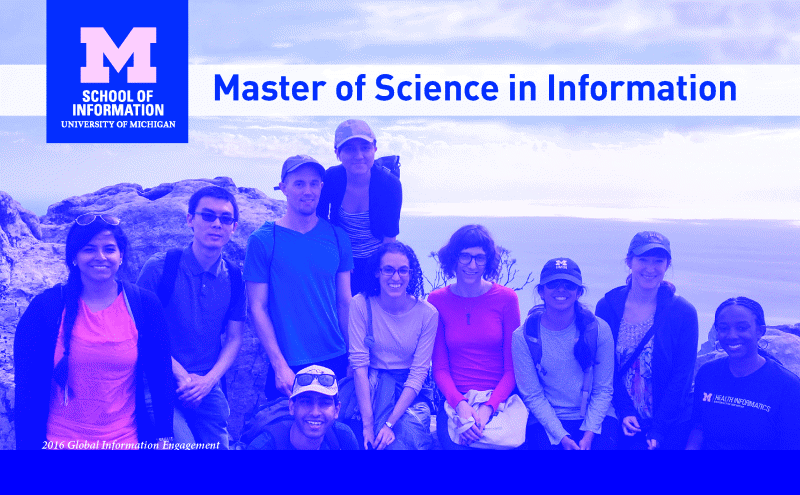

In [106]:
# Changing color of an image
from PIL import ImageColor # This module is used by PIL.Image.new() and the ImageDraw module, among others.
from PIL import ImageEnhance
from PIL import ImageDraw

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB') # <--
print('Width: ', image.width, ' Height: ', image.height)
#display(image)

# Creating a new empty canvas
contact_sheet = PIL.Image.new(image.mode, (image.width, int(image.height*1.1)))
print('Width: ', contact_sheet.width, ' Height: ', contact_sheet.height)

height_difference = abs(image.height - contact_sheet.height)
print("Height of black box: ", height_difference)

# Pasting photo to new canvas
contact_sheet.paste(image, (0, 0))
print("type and mode of 'contact_sheet': ", type(contact_sheet), contact_sheet.mode)
#print(".getcolors",contact_sheet.getcolors())

"""
newRed   = 1*oldRed  +  0*oldGreen  +  0*oldBlue  + constant
newGreen = 0*oldRed  +  1*OldGreen  +  0*OldBlue  + constant
newBlue  = 0*oldRed  +  0*OldGreen  +  1*OldBlue  + constant
"""
# https://www.geeksforgeeks.org/python-channel-drop-using-pillow/?ref=lbp
# A 12-value tuple which is a transform matrix for dropping
# green channel (in this case)
matrix = ( 1, 0, 0, 0,
           0, 1, 0, 0,
           0, 0, 1, 255
         )
         
print(len(matrix))
# Transforming the image to RGB using the aforementioned matrix
img = contact_sheet.convert("RGB", matrix) # he matrix argument only supports “L” and “RGB”.
display(img)


Width:  800  Height:  450
Width:  800  Height:  495
Height of black box:  45


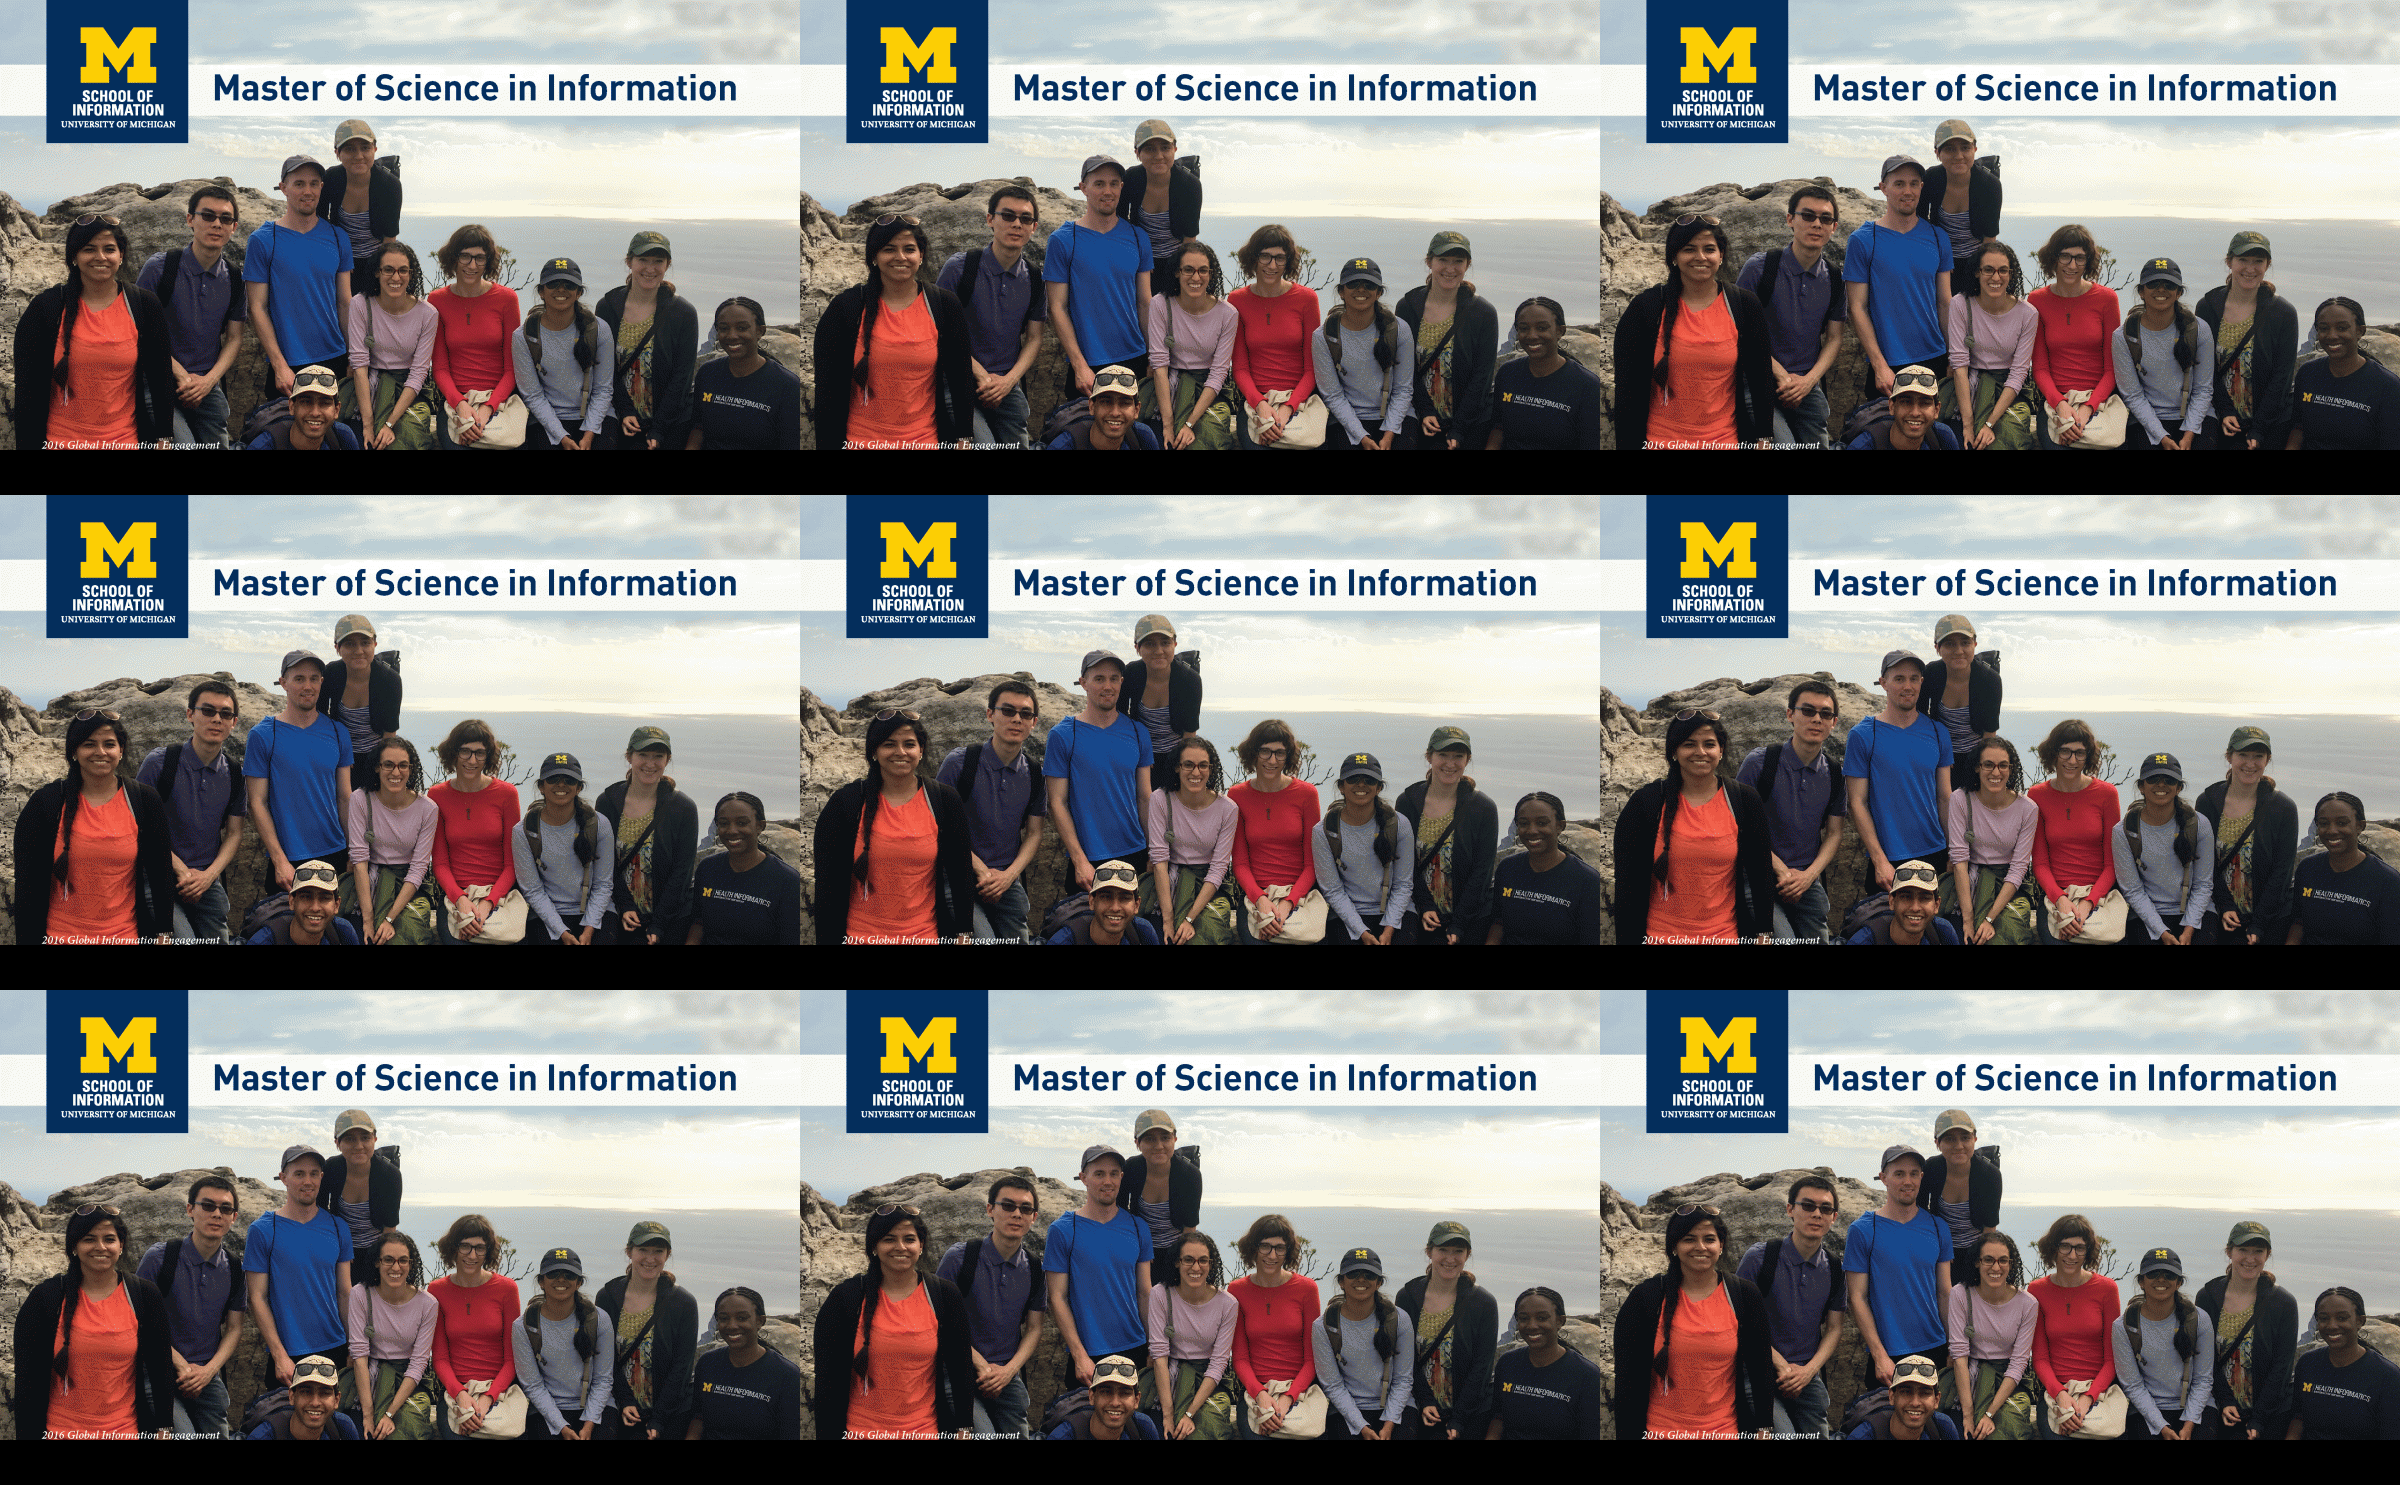

In [104]:
# Set up 3x3 picture with black box

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')
print('Width: ', image.width, ' Height: ', image.height)
#display(image)

# Creating a new empty canvas
contact_sheet = PIL.Image.new(image.mode, (image.width, int(image.height*1.1)))
print('Width: ', contact_sheet.width, ' Height: ', contact_sheet.height)

height_difference = abs(image.height - contact_sheet.height)
print("Height of black box: ", height_difference)

# Pasting photo to new canvas
contact_sheet.paste(image, (0, 0))

# Creating a big canvas
images = []
for i in range(1, 10):
    images.append(contact_sheet)

big_contact_sheet = PIL.Image.new(contact_sheet.mode, (contact_sheet.width*3,contact_sheet.height*3))
x=0
y=0
first_image = images[0]
for img in images:
    # Lets paste the current image into the contact sheet
    big_contact_sheet.paste(img, (x, y) )
    if x+first_image.width == big_contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width
        
display(big_contact_sheet)

In [201]:
# Drawing a rectangle into the image
#draw = ImageDraw.Draw(contact_sheet)
#draw.rectangle(xy = (50, 50, 150, 150),
#               fill = (255, 127, 0),
#               outline = (255, 255, 255),
#               width = 50)

# Color conversion
#display(contact_sheet)
# drop green
matrix = ( 1, 0, 0, 0,
           0, 0, 0, 0,
           0, 0, 1, 0
         )
         
# Transforming the image to RGB using the aforementioned matrix
img = contact_sheet.convert("RGB", matrix) # he matrix argument only supports “L” and “RGB”.
#display(img)    




## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.